In [1]:
import numpy as np
import pandas as pd     
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('harga_rumah.csv')
df = pd.DataFrame(data)
print(df.head())
print(df.info())
print(df.describe())

   luas_rumah_m2  jumlah_kamar  harga_juta
0             60             2         400
1             80             3         650
2            100             3         700
3            120             4         900
4            150             4        1200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   luas_rumah_m2  10 non-null     int64
 1   jumlah_kamar   10 non-null     int64
 2   harga_juta     10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes
None
       luas_rumah_m2  jumlah_kamar   harga_juta
count       10.00000     10.000000    10.000000
mean       108.00000      3.300000   823.000000
std         32.50641      0.948683   293.751596
min         60.00000      2.000000   400.000000
25%         83.75000      3.000000   657.500000
50%        105.00000      3.000000   750.000000
75%        127.50000      4.000000   975.000000

In [3]:
x = df.drop('harga_juta', axis=1)
y= df['harga_juta']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
model =LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred =model.predict(x_test_scaled)
print(f"prediksi harga rumah: {y_pred} juta Rupiah")
print(f"harga rumah sebenarnya: {y_test.values} juta Rupiah")


prediksi harga rumah: [1021.89671362  561.69953052  481.36150235] juta Rupiah
harga rumah sebenarnya: [1000  650  550] juta Rupiah


In [6]:
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
print(f"mean squared error = {mse:.2f}")
print(f"root mean squared error = {rmse:.2f}")
print("Jadi prediksi model meleset (rata-rata) sebanyak root mean squared error ")

mean squared error = 4329.23
root mean squared error = 65.80
Jadi prediksi model meleset (rata-rata) sebanyak root mean squared error 


In [7]:
data_baru = pd.DataFrame({
    'luas_rumah_m2' : [125,85],
    'jumlah_kamar' : [4,2]
})
data_baru_scaled = scaler.transform(data_baru)
pred_data_baru = model.predict(data_baru_scaled)

for i in range(len(pred_data_baru)):
    luas = data_baru['luas_rumah_m2'][i]
    kamar = data_baru['jumlah_kamar'][i]
    harga = pred_data_baru[i]
    print(f"Prediksi harga rumah ke {i+1} dengan luas {luas} m2 dan jumlah kamar {kamar} adalah {harga:.2f} juta Rupiah")

Prediksi harga rumah ke 1 dengan luas 125 m2 dan jumlah kamar 4 adalah 979.69 juta Rupiah
Prediksi harga rumah ke 2 dengan luas 85 m2 dan jumlah kamar 2 adalah 565.77 juta Rupiah


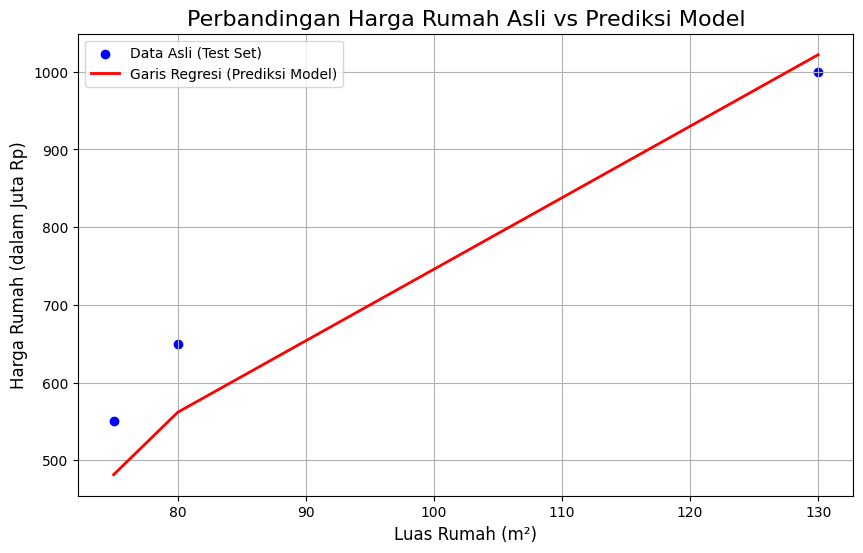

In [8]:
x_test_original = x.loc[y_test.index]

# Urutkan nilai agar garis regresi tergambar dengan baik
plot_data = pd.DataFrame({'luas': x_test_original['luas_rumah_m2'], 'harga': y_test, 'prediksi': y_pred}).sort_values('luas')

plt.figure(figsize=(10, 6)) # Atur ukuran gambar

# Plot data asli dari test set (scatter plot)
plt.scatter(plot_data['luas'], plot_data['harga'], color='blue', label='Data Asli (Test Set)')

# Plot garis prediksi dari model (line plot)
plt.plot(plot_data['luas'], plot_data['prediksi'], color='red', linewidth=2, label='Garis Regresi (Prediksi Model)')

# Menambahkan judul dan label
plt.title('Perbandingan Harga Rumah Asli vs Prediksi Model', fontsize=16)
plt.xlabel('Luas Rumah (m²)', fontsize=12)
plt.ylabel('Harga Rumah (dalam Juta Rp)', fontsize=12)
plt.legend() # Menampilkan label 'Data Asli' dan 'Garis Regresi'
plt.grid(True) # Menambahkan grid untuk mempermudah pembacaan
plt.show() # Tampilkan grafiknya
